<a href="https://www.kaggle.com/code/mustafadagteki/sales-method-analysis?scriptVersionId=154765835" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# PENS AND PRINTERS COMPANY, SALES METHOD ANALYSIS FOR NEW PRODUCT LINE

## Introduction
Pens and Printers, founded in 1984, is a high-quality office products provider for large organizations. They are launching a new and expensive product line, and in this report, we will conduct analyses to find the best technique to sell the new product line effectively.

The expected outcomes from this report are:

- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

## 1 - Data Preperation & Validation

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and explore the dataset
sales = pd.read_csv('/kaggle/input/portfolio-projects-data/product_sales.csv')
sales.shape

(15000, 8)

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
# Descriptive statistics about the data in each column
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [5]:
sales_customer_over = sales[sales['years_as_customer'] > 39]
sales_customer_over

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [6]:
# Remove the extreme values from years_as_customer 
sales = sales[sales['years_as_customer'] <= 39]
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  object 
 2   customer_id        14998 non-null  object 
 3   nb_sold            14998 non-null  int64  
 4   revenue            13924 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


In [7]:
# Check the week column values
sales.week.unique()

array([2, 6, 5, 4, 3, 1])

In [8]:
# Check the sales_method column values
sales.sales_method.unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [9]:
# Check the customer_id column values
sales.customer_id.nunique()

14998

In [10]:
# Check the state column values
sales.state.nunique()

50

In [11]:
# Replace the wrong sales methods with the correct ones
sales['sales_method'] = sales['sales_method'].replace({'em + call':'Email + Call', 'email':'Email'})
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [12]:
# Check the sales_method column values
sales.sales_method.unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [13]:
# Find the total missing values in revenue column
sales.revenue.isnull().sum()

1074

In [14]:
# Find the missing values in each sales_method
sales.groupby('sales_method')['revenue'].apply(lambda x: x.isnull().sum())

sales_method
Call            181
Email           544
Email + Call    349
Name: revenue, dtype: int64

In [15]:
sales_non_null = sales[~ sales['revenue'].isnull()]

In [16]:
# Calculate the average revenue
avg_revenue = round(sales_non_null['revenue'].sum() / sales_non_null['nb_sold'].sum(),2)
avg_revenue

9.36

In [17]:
# Replace missing values
sales['revenue'] = sales['revenue'].fillna(avg_revenue * sales['nb_sold'])

In [18]:
sales.shape

(14998, 8)

The original dataset has 15000 rows and 8 columns, after data validation, 14998 rows remains. Following table describes the validation process.

| **Column Name** | **Data Type** | **Details** |
|---|---|---|
| week | _Numeric_ | There were 6 unique week number as expected. |
| sales_method |  _Character_ | Method names was different than expected, after correcting misspelled/wrongly capitalized method names ('em + call' and 'email'), there are 3 unique method name left. |
| customer_id | _Character_ | There were 15000 rows and all customer ids are unique, there are no duplicates, as expected. |
| nb_sold | _Numeric_ | There were 15000 'number of sold' value exist in range 7 to 16, this matches what is expected. |
| revenue | _Numeric_ | The revenue column has (15000 - 13926) 1074 missing values. Those values are replaced with the value calculated by multiplying average revenue (derived from total non missing revenue divided to total non missing numbers sold, approx. 9.36) with the nb_sold (number of products sold / Missing values Call:181, Email:544, Email + Call:349, Total:1074). None missing values left on the column.|
| years_as_customer | _Numeric_ | There were two non logical value (47 and 63) higher than company age (company founded in 1984) those two values are removed from the data set. 14998 rows left.|
| nb_site_visits | _Numeric_ | There were 15000 'number of site visits' value exist in range 12 to 41, this matches what is expected. |
| state | _Character_ | There were 15000 'state' value in 50 unique state names, this matches what is expected. | 


## 2 - Exploratory Analysis
### 2.1 How many customers were there for each approach ?

In [19]:
# Data count on sales_method groups
sales['sales_method'].value_counts()

sales_method
Email           7465
Call            4961
Email + Call    2572
Name: count, dtype: int64

In [20]:
# Data percentage on sales_method groups
round(sales['sales_method'].value_counts(normalize=True),4)*100

sales_method
Email           49.77
Call            33.08
Email + Call    17.15
Name: proportion, dtype: float64

**Table 1. Distribution of customers on each sales method.**

| Sales Method | Customers | % in Total |
|---|---|---|
| Email | 7,465 | 49.77 % |
| Call | 4,961 | 33.08 % |
| Email + Call | 2,572 | 17.15 % |
| Total | 14,998 |  |


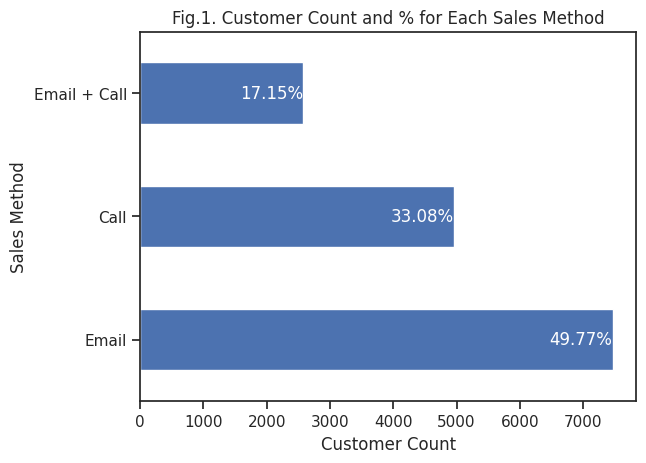

In [21]:
sns.set(style='ticks')
customer_count = sales['sales_method'].value_counts()
customer_count.plot.barh()
plt.xlabel('Customer Count')
plt.ylabel('Sales Method')
plt.title('Fig.1. Customer Count and % for Each Sales Method')
for index, value in enumerate(customer_count):
    percentage = value / len(sales) * 100
    plt.text(value, index, f'{percentage:.2f}%', color='white', ha='right', va='center')
plt.show()

### 2.2 What does the spread of the revenue look like overall? And for each method?

In [22]:
# Split database in each method for analysis
sales_e = sales[sales['sales_method'] == 'Email']
sales_c = sales[sales['sales_method'] == 'Call']
sales_e_c = sales[sales['sales_method'] == 'Email + Call']

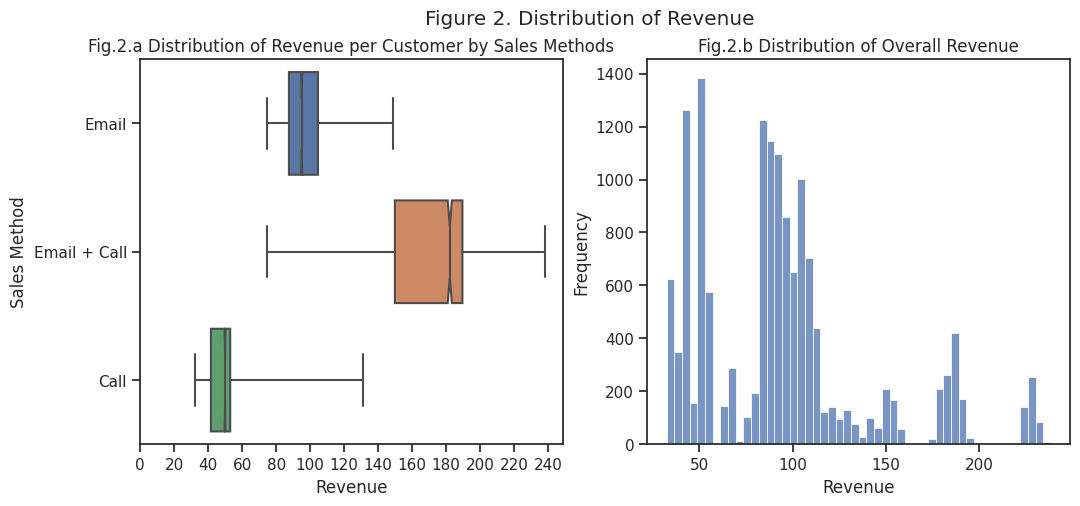

In [23]:
# Distribution of Revenue By General and By Sales Methods
figure, axes = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=False, gridspec_kw={'hspace':0.5}, figsize=(12,5))
plt.suptitle('Figure 2. Distribution of Revenue')
sns.boxplot(y=sales['sales_method'], x=sales['revenue'], whis=(0, 100), notch=True, ax=axes[0])
axes[0].set_title('Fig.2.a Distribution of Revenue per Customer by Sales Methods')
axes[0].set_ylabel('Sales Method')
axes[0].set_xlabel('Revenue')
axes[0].set_xticks(np.arange(0, 250, 20))

sns.histplot(sales['revenue'], bins=50, ax=axes[1])
axes[1].set_title('Fig.2.b Distribution of Overall Revenue')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Revenue')
plt.show()

As you will see from the box plots and histogram in Figure 2.a and b the over all revenue count is clustered arround 40-50 and 80-110 range.
The revenue related Call method is clustered arround 45-55 range,
The revenue related Email method is clustered arround 80-110 range,
The revenue related Email + Call is clustered arround 150, 180 range.

In [24]:
# Revenue totals for each sales method group
revenue_by_method = round(sales.groupby('sales_method')['revenue'].sum(),2)
revenue_by_method

sales_method
Call            244014.70
Email           722165.57
Email + Call    449000.77
Name: revenue, dtype: float64

In [25]:
total_revenue = round(sales["revenue"].sum(),2)
total_revenue

1415181.04

In [26]:
# Email total revenue
e_revenue = round(sales_e['revenue'].sum(),2)
e_revenue

722165.57

In [27]:
# Call total revenue
c_revenue = round(sales_c['revenue'].sum(),2)
c_revenue

244014.7

In [28]:
# Email + Call total revenue
e_c_revenue = round(sales_e_c['revenue'].sum(),2)
e_c_revenue

449000.77

In [29]:
# Calculate the proportions
prop_rev_e = round((e_revenue / total_revenue) * 100,2)
prop_rev_c = round((c_revenue / total_revenue) * 100,2)
prop_rev_e_c = round((e_c_revenue / total_revenue) * 100,2)
prop_rev_e, prop_rev_c, prop_rev_e_c

(51.03, 17.24, 31.73)

**Table 2. Distribution of revenue on each sales method.**

| Sales Method | Revenue | % in Total |
|---|---|---|
| Email | 722,165.57 | 51.03 % |
| Call | 244,014.70 | 17.24 % |
| Email + Call | 449,000.77 | 31.73 % |
| Total | 1,415,181.04 |  |

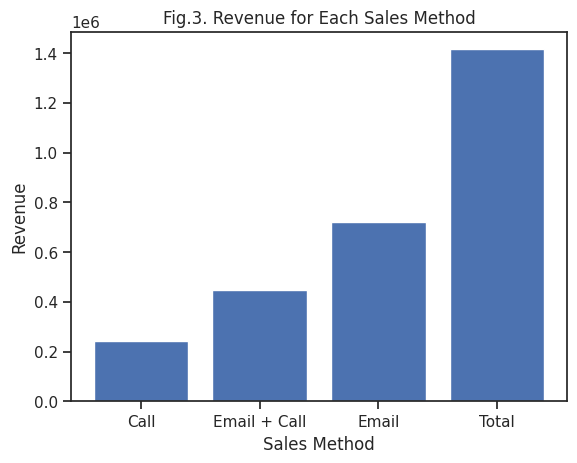

In [30]:
# Spread of the revenue by total and sales methods
revenue_by_method_dict = {'Sales Method':['Call','Email + Call', 'Email', 'Total'],'Revenue':[244014.70,449000.77,722165.57,1415181.04]}
revenue_d = pd.DataFrame(revenue_by_method_dict)
plt.bar(revenue_d['Sales Method'], revenue_d['Revenue'])
plt.ylabel('Revenue')
plt.xlabel('Sales Method')
plt.title('Fig.3. Revenue for Each Sales Method')
plt.show()

### 2.3 Was there any difference in revenue over time for each of the methods?

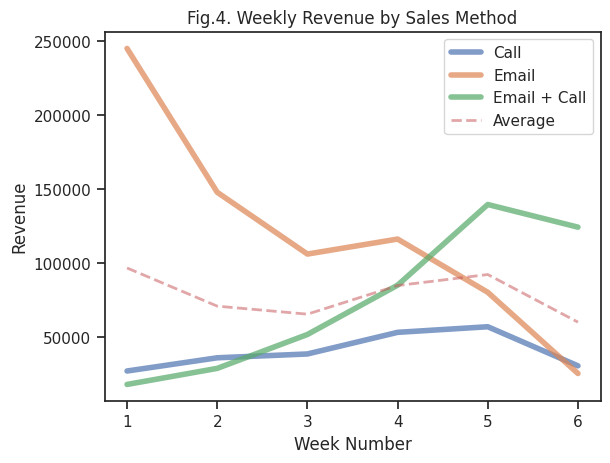

In [31]:
# Weekly revenue by sales method
weekly_rev_meth = sales.groupby(['week', 'sales_method'])['revenue'].sum()
weekly_rev_meth_uns = weekly_rev_meth.unstack()
avg_weekly_revenue = sales.groupby('week')['revenue'].sum() / 3
plt.plot(weekly_rev_meth_uns, alpha=0.7, linewidth=4)
plt.plot(avg_weekly_revenue, alpha=0.5,linewidth=2, linestyle='--')
plt.xlabel('Week Number')
plt.ylabel('Revenue')
plt.title('Fig.4. Weekly Revenue by Sales Method')
plt.legend(['Call', 'Email', 'Email + Call', 'Average'])
plt.show()

- Customers in **'Email' group** received an email when the product line was launched and a further email 3 weeks later. As you could see in the graphic the revenue starts decreasing untill second email send(week 3) and then there is a slight increase after the emails then revenue start decreasing.
- Customers in **'Call' group** were called by a member of the sales team for a call length of 30 minutes per customer. Since we have no information about the call time we can not evaluate the effect on revenue.
- Customers in **'Email + Call' group** were first received an email and then a week later they received a call with a length of 10 minutes. The exact timing of email was not stated so we are not sure about the effect. But as you could see in the graphic there is a permanent increase until week 5 then revenue starts decreasing. In my opinion the effect of the call after email has multipliued the increase in the revenue.  

We could clearly see the increase in 'Email + Call' method revenue and decrease in 'Email' method over weeks. The mean (average) revenue level indicated as a dashed line for sales methods for comparison.

## 3 - Defining a metric for the business to monitor the progress

To be able to decide choosing a metric to monitor progress, we should explore dataset to see are there any other negative or positive linear relations between our variables.

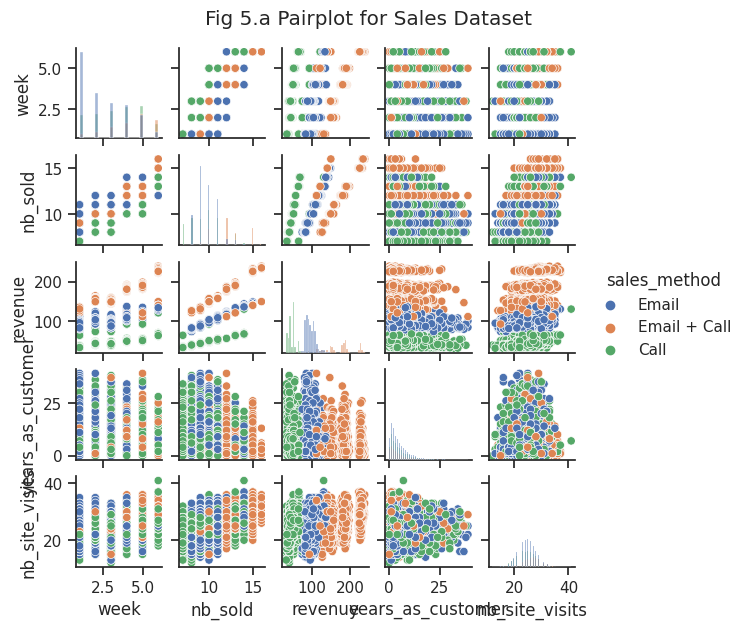

In [32]:
# Cretae a pair plot to see the paired relations
sns.pairplot(sales, hue='sales_method', diag_kind="hist", height=1.2)
plt.suptitle('Fig 5.a Pairplot for Sales Dataset', y=1.04)
plt.show()

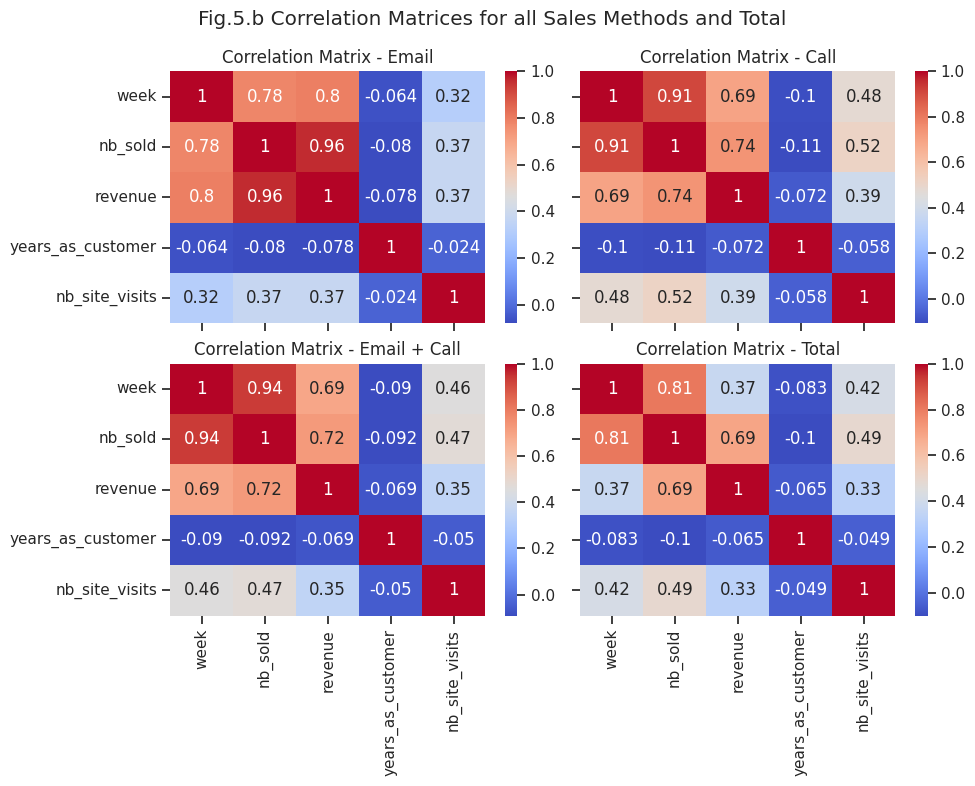

In [33]:
# Create correlation matrices
correlation_matrix = sales.select_dtypes(include='number').corr()
correlation_matrix_e = sales_e.select_dtypes(include='number').corr()
correlation_matrix_c = sales_c.select_dtypes(include='number').corr()
correlation_matrix_e_c = sales_e_c.select_dtypes(include='number').corr()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharey=True, sharex=True)

sns.heatmap(correlation_matrix_e, annot=True, cmap='coolwarm', ax=axes[0, 0])
sns.heatmap(correlation_matrix_c, annot=True, cmap='coolwarm', ax=axes[0, 1])
sns.heatmap(correlation_matrix_e_c, annot=True, cmap='coolwarm', ax=axes[1, 0])
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])

axes[0, 0].set_title('Correlation Matrix - Email')
axes[0, 1].set_title('Correlation Matrix - Call')
axes[1, 0].set_title('Correlation Matrix - Email + Call')
axes[1, 1].set_title('Correlation Matrix - Total')
plt.suptitle('Fig.5.b Correlation Matrices for all Sales Methods and Total')

plt.tight_layout()
plt.show()

In Figure 5.a and b, pairplots and correlation matrices does not show any extreme positive and negative linear relation (the linear relations between revenue, nb_sold, and avg_revenue has naturally positive linear correlation) except the following:

- In our correlation matrix one of the interesting relations is the negative relation between years_as_customer and other variables. it is very weak but needs attention. Lets take a look at that

In [34]:
# group year_as_customer as longevity
longv_labels = ['0-4 years','5-9 years','10-14 years','15-19 years','20-24 years','25-29 years','30-34 years','35-39 years']
sales['longevity_group'] = pd.cut(sales['years_as_customer'], bins=[-1,4,9,14,19,24,29,34,39 ], labels=longv_labels)

In [35]:
sales['longevity_group'].unique()

['0-4 years', '5-9 years', '10-14 years', '20-24 years', '15-19 years', '35-39 years', '30-34 years', '25-29 years']
Categories (8, object): ['0-4 years' < '5-9 years' < '10-14 years' < '15-19 years' < '20-24 years' < '25-29 years' < '30-34 years' < '35-39 years']

In [36]:
# Get the revenue by longevity group
rev_by_longevity = round(sales.groupby('longevity_group')['revenue'].sum().sort_values(ascending=False),2)
rev_by_longevity

longevity_group
0-4 years      862385.88
5-9 years      354461.61
10-14 years    126882.03
15-19 years     44730.06
20-24 years     16247.35
25-29 years      6412.09
30-34 years      2774.15
35-39 years      1287.87
Name: revenue, dtype: float64

In [37]:
# Calculate the percentages of revenue
percent_cust_long_rev = [round((x / total_revenue) * 100,2) for x in rev_by_longevity]
percent_cust_long_rev

[60.94, 25.05, 8.97, 3.16, 1.15, 0.45, 0.2, 0.09]

In [38]:
# Number of customers in each longevity group
customer_numb_by_long = sales.groupby('longevity_group')['customer_id'].count()
customer_numb_by_long

longevity_group
0-4 years      8919
5-9 years      3862
10-14 years    1413
15-19 years     501
20-24 years     182
25-29 years      69
30-34 years      36
35-39 years      16
Name: customer_id, dtype: int64

In [39]:
# Calculate the percentages of customer numbers
percent_customer_numb_by_long = [round((x / len(sales)) * 100,2) for x in customer_numb_by_long]
percent_customer_numb_by_long 

[59.47, 25.75, 9.42, 3.34, 1.21, 0.46, 0.24, 0.11]

In [40]:
# Calculate the average revenue per customer by longevity group
avg_rev_per_customer_by_longevity = round(rev_by_longevity / customer_numb_by_long,2)
avg_rev_per_customer_by_longevity

longevity_group
0-4 years      96.69
5-9 years      91.78
10-14 years    89.80
15-19 years    89.28
20-24 years    89.27
25-29 years    92.93
30-34 years    77.06
35-39 years    80.49
dtype: float64

**Table 3. Revenue distribution by Customer longevity intervals**

| Customer Longevity | Revenue | % of T. Rev. | Customer Count | % of T. Cust.| Revenue Per Customer |
|---|---|---|---|---|--|
| 0-4 years | 862,385.88 | 60.94 % | 8,919 | 59.47 % | 96.69 |
| 5-9 years | 354,461.61 | 25.05 % | 3,862 | 25.75 % | 91.78 |
| 10-14 years| 126,882.03 | 8.97 % | 1,413 | 9.42 % | 89.80 |
| 15-19 years | 44,730.06 | 3.16 % | 501 | 3.34 % | 89.28 |
| 20-24 years | 16,247.35 | 1.15 % | 182 | 1.21 % | 89.27 |
| 25-29 years | 6,412.09 | 0.45 % | 69 | 0.46 % | 92.93 |
| 30-34 years | 2,774.15 | 0.20 % | 36 | 0.24 % | 77.06 |
| 35-39 years | 1,287.87 | 0.09 % | 16 | 0.11 % | 80.49 |
| Total | 1,415,181.04 |  | 14,998 |  | 93.94 |

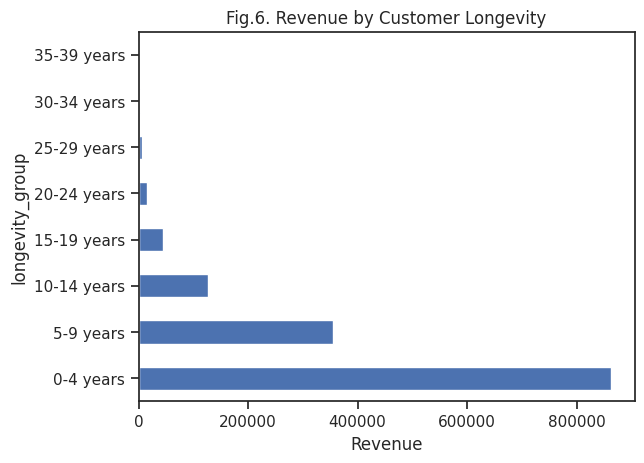

In [41]:
# plot the Longevity revenue relationship
longevity = sales.groupby('longevity_group')['revenue'].sum().sort_values(ascending=False)
longevity.plot.barh()
plt.xlabel('Revenue')
plt.title('Fig.6. Revenue by Customer Longevity')
plt.show()

We have reached a very important information that the 60% of the revenue comes from customers who are customer for less then 5 years.(As we can see in the Table 4 and Figure 6.) Almost 85% of the revenue comes from the customers who has less then 10 years of longevity. 

As the number of years of longevity increases there is a decrease in the revenue. 

Also the majority of the customers (85% - 12781) who has less then 10 years of longevity.

We will make suggestions about this subject in the summary section.

## 4 - Summary & Recommendations
### 4.1 Which business metrics should be used to monitor the effectiveness of the method ?

According to our analysis the key indicator here is the revenue per customer (or method application - since each call, email, or combination attempt calculated as one). The average sales revenue we made after each method attemp. ***So we will use average revenue per customer as a business metric to monitor.*** (total revenue / number of customers) For details see Table 4.

### 4.2 Based on the data, which method would you recommend we continue to use?

In [42]:
metric = round(revenue_by_method / customer_count,2)
metric

sales_method
Call             49.19
Email            96.74
Email + Call    174.57
dtype: float64

**Table 4. The distribution of Revenue Per Customer (as performance indicator)**

| Sales Method | Customers | Revenue | Revenue per Customer |
|---|---|---|---|
| Email | 7,465 | 722,165.57 | 96.74 |
| Call | 4,961 | 244,014.70 | 49.19 |
| Email + Call | 2,572 | 449,000.77 | 174.57 |
| Total | 14,998 | 1,415,181.04 |94.76 |

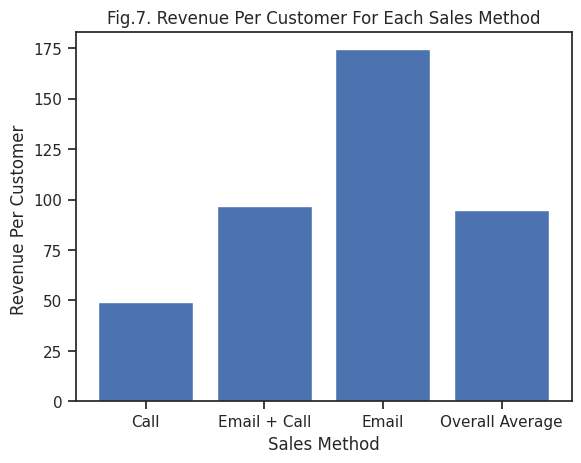

In [43]:
# Spread of the avg revenue by sales methods
avg_revenue_by_method_dict = {'Sales Method':['Call','Email + Call', 'Email', 'Overall Average'],'Revenue Per Customer':[49.19,96.74, 174.57,94.76]}
avg_revenue_d = pd.DataFrame(avg_revenue_by_method_dict)
plt.bar(avg_revenue_d['Sales Method'], avg_revenue_d['Revenue Per Customer'])
plt.ylabel('Revenue Per Customer ')
plt.xlabel('Sales Method')
plt.title('Fig.7. Revenue Per Customer For Each Sales Method')
plt.show()

- When we look at the Figure 4 and Table 1 and 2 we can easily conclude that the **'Call' method** is not a very productive method. Since we are spending 30 minutes per customer, the sales team could not be able to reach higher numbers of customers (Call method reached 33.08 % of customers but only achieved 17.24 % of revenue) and the revenue results are not promising.Also in figure 2 we can observe that the method is clustered arround 45-55 revenue per attempt band.Since we are planning to sell an expensicve product line this method is not suitable. Revenue per customer rate for 'Call' method is 49.19, which is a very low amount when compared to average. We do not suggest to use call method alone.

- The **'Email' method** has a promising beginning but it is clear that by the time (Figure 2, after week 4 the revenue starts decreasing, this means that the effect range of two emails lasts 4.5 weeks) it loses its effectiveness. Email method reached almost 50% of customers and achieved 51.03 % of revenue, these are great numbers but the revenue per customer rate of 'Email' method is 96.74. Little below the average revenue per customer. This is a very low cost method to apply. And gives a lot of time for sales personnel to reach more customers.

- The **'Email + Call' method** is not very effective in first couple weeks (This probably is the period that the email is being sent) In figure 4 we observe that, after week 2, revenue starts increasing fast, untill week 5, then there is a slight decrease. The cost of applying this method is not very high a 'Call' method but higher than 'Email' method since there is a 10 minute phone call involved. The average revenue per customer is very high for this method, 174.57. Since only 17.15 % of customers reached by 'Email + Call' but the share in total revenue is  31.73 %. This means if we can focus on reaching more customers with this method we could increase our revenue faster that 'Email' and 'Call' methods. ***Pen and Printers should use the 'Email + Call' method to achieve their goals.***

- Additionally, we can develop different methods based on our data, for example if we apply a 'Email + Email + Call ' method there is a high possibility that we can increse our revenue per customer performance. Since emails are very easy to apply and almost has no cost. (If we recall the Figure 4.) With this method if we can combine the first 4 weeks performance of 'Email' method with last two weeks performane of 'Email + Call' method this might provide us more revenue.

- Another approach could be asking customer preference for the contact method, in some cases this is more productive than applying a non consent method.

### 4.3 Turning Longevity into Loyalty
The methods that we use to reach out the customers ar e  very important for increaing our revenue, but in this specific case there is one important strategy. As we have stated in the analyses section, there is a negative relation between the customer longevity 
(years_as_customer) revenue, and customer count. The 60% of revenue made by customers which has less than 5 years of longevity, and 85 % has less then 10 years. To be able to incerease our revenue we should apply two strategies:

1.  We should find new ways to reach more new customers and spend our energy and motivation to customers that has relation to company 5 or less years 

2.  We should analyze the reason behind the decreasing revenue and customer numbers by longevity. It is very obvious that we are starting to lose customers mostly after 10th year. Is it becasue of poor connection, poor service, competition or overrated relationships? Does sales team spending less time for the high longevity customers than the new ones ? We do not have enough space and information to analyze the relation deeply here.

### 4.4 Final Thoughts

There are some caveats that effects our ability to deliver more insights:

- Firstly we do not have any information about the failed attempts (number and details of the customers who did not made any purchase after application of a method).
    
 - Secondly, we only have information about the timing of sales as a week number, but the lack of calrity on the execution timing of the email and calls in the 'Call' and 'Email + Call' methods makes it harder to analyze the effect of the method during the 6 weeks of period.
    
- Thirdly we have the quantity of items sold but wee do not have the total number of purchases. The customer might have bought all items at once or in different parties. The lack of clarity in thissubject also effects the ablity of analyses.
    
- Lastly We do not have any information about the sales force used in each method during the 6 weeks period. We could have develop some other kinds of nmetrics based on personnel performance according to related information.